## Deepmalya Dutta | MDS202218

### 1. Importing the libraries

In [42]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### 2. Loading the datasets

In [10]:
train = pd.read_csv("./Datasets/train.csv")
train_X, train_y = train.text, train.spam

test = pd.read_csv("./Datasets/test.csv")
test_X, test_y = test.text, test.spam

val = pd.read_csv("./Datasets/validation.csv")
val_X, val_y = val.text, val.spam

### 3. Fitting a model

In [11]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=2000)),
    ('clf', LogisticRegression(random_state=1, max_iter=2000)),
])

pipeline.fit(train_X, train_y)

train_score = pipeline.score(train_X, train_y)
validation_score = pipeline.score(val_X, val_y)

print(f'Training Accuracy: {train_score}')
print(f'Validation Accuracy: {validation_score}')

Training Accuracy: 0.9918144611186903
Validation Accuracy: 0.9803707742639041


#### Model Predictions

In [31]:
predict = pd.concat([pd.DataFrame(pipeline.predict(test_X)), pd.DataFrame(test_y.values)], axis=1)
predict.columns = ["Predicted values", "Actual values"]
predict.head(10)

,Predicted values,Actual values
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


### 4. Improving the model

- Model 1 - Logistic Regression

In [38]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(random_state=1, max_iter=2000)),
])

space = dict()
space['tfidf__max_features'] = [1000, 2000, 5000]
space['clf__C'] = [0.01, 0.1, 1.0]

search = GridSearchCV(pipeline, space, cv=3, verbose=1, n_jobs=-1, scoring='accuracy')
result = search.fit(pd.concat([train_X, val_X], axis=0), pd.concat([train_y, val_y], axis=0))

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Score: 0.9773033906266608
Best Hyperparameters: {'clf__C': 1.0, 'tfidf__max_features': 2000}


In [39]:
clf = search.best_estimator_
test_accuracy = clf.score(test_X, test_y)
print("Test Accuracy with Best Model: ", test_accuracy)

Test Accuracy with Best Model:  0.9755671902268761


- Model 2 - Random Forest

In [45]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier(random_state=1, n_estimators=100)),
])

space = dict()
space['tfidf__max_features'] = [1000, 2000, 5000]
space['rf__n_estimators'] = [50, 100, 200]

search = GridSearchCV(pipeline, space, cv=3, verbose=1, n_jobs=-1, scoring='accuracy')
result = search.fit(pd.concat([train_X, val_X], axis=0), pd.concat([train_y, val_y], axis=0))

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Score: 0.9855952368707076
Best Hyperparameters: {'rf__n_estimators': 100, 'tfidf__max_features': 5000}


In [46]:
rf = search.best_estimator_
test_accuracy = rf.score(test_X, test_y)
print("Test Accuracy with Best Model: ", test_accuracy)

Test Accuracy with Best Model:  0.987783595113438


- Model 3 - Decision Tree

In [48]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('dt', DecisionTreeClassifier(random_state=1)),
])

space = dict()
space['tfidf__max_features'] = [1000, 2000, 5000]
space['dt__max_depth'] = [None, 10, 20, 30]

search = GridSearchCV(pipeline, space, cv=3, verbose=1, n_jobs=-1, scoring='accuracy')
result = search.fit(pd.concat([train_X, val_X], axis=0), pd.concat([train_y, val_y], axis=0))

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Score: 0.9580960397544604
Best Hyperparameters: {'dt__max_depth': None, 'tfidf__max_features': 1000}


In [49]:
dt = search.best_estimator_
test_accuracy = dt.score(test_X, test_y)
print("Test Accuracy with Best Model: ", test_accuracy)

Test Accuracy with Best Model:  0.9589877835951134


### We see random forest model scores highest on our testing data

In [50]:
pred_y = rf.predict(test_X)
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       841
           1       0.98      0.98      0.98       305

    accuracy                           0.99      1146
   macro avg       0.98      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146



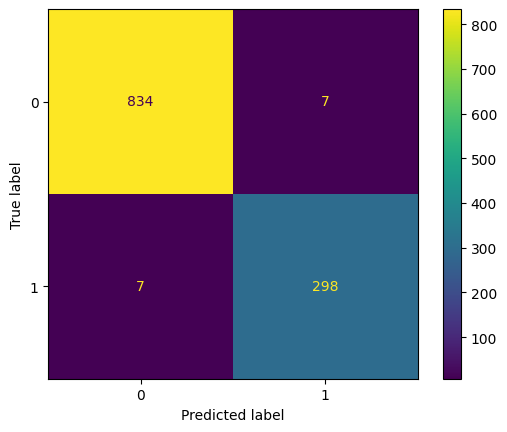

In [51]:
ConfusionMatrixDisplay.from_estimator(rf, test_X, test_y)
plt.show()